# Logistic Regression
> class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None


Parameters:

**penalty**: {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

Specify the norm of the penalty:

-   `None`: no penalty is added;
    
-   `'l2'`: add a L2 penalty term and it is the default choice;
    
-   `'l1'`: add a L1 penalty term;
    
-   `'elasticnet'`: both L1 and L2 penalty terms are added.
    

	Warning

Some penalties may not work with some solvers. See the parameter  `solver`  below, to know the compatibility between the penalty and solver.



**dual** : bool, default=False

Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

**tol** : float, default=1e-4

Tolerance for stopping criteria.

**C** : float, default=1.0

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

**fit_intercept** : bool, default=True

Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

**intercept_scaling** : float, default=1

Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes  `intercept_scaling  *  synthetic_feature_weight`.

Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

**class_weight** : dict or ‘balanced’, default=None

Weights associated with classes in the form  `{class_label:  weight}`. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as  `n_samples  /  (n_classes  *  np.bincount(y))`.

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.



**random_state** : int, RandomState instance, default=None

Used when  `solver`  == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state)  for details.

**solver** : {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

> -   For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
>     
> -   For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
>     
> -   ‘liblinear’ is limited to one-versus-rest schemes.
>     
> -   ‘newton-cholesky’ is a good choice for  `n_samples`  >>  `n_features`, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on  `n_features`  because it explicitly computes the Hessian matrix.
>     

Warning

The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

-   ‘lbfgs’ - [‘l2’, None]
    
-   ‘liblinear’ - [‘l1’, ‘l2’]
    
-   ‘newton-cg’ - [‘l2’, None]
    
-   ‘newton-cholesky’ - [‘l2’, None]
    
-   ‘sag’ - [‘l2’, None]
    
-   ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]
    

Note

‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from  [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing "sklearn.preprocessing").

See also

Refer to the User Guide for more information regarding  [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression "sklearn.linear_model.LogisticRegression")  and more specifically the  [Table](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)  summarizing solver/penalty supports.

**max_iter** : int, default=100

Maximum number of iterations taken for the solvers to converge.

**multi_class** : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution,  _even when the data is binary_. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

**verbose** : int, default=0

For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

**warm_start** : bool, default=False

When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver. See  [the Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start).

**n_jobs** : int, default=None

Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the  `solver`  is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not.  `None`  means 1 unless in a  [`joblib.parallel_backend`](https://joblib.readthedocs.io/en/latest/parallel.html#joblib.parallel_backend "(in joblib v1.3.0.dev0)")  context.  `-1`  means using all processors. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-n_jobs)  for more details.

**l1_ratio** : float, default=None

The Elastic-Net mixing parameter, with  `0  <=  l1_ratio  <=  1`. Only used if  `penalty='elasticnet'`. Setting  `l1_ratio=0`  is equivalent to using  `penalty='l2'`, while setting  `l1_ratio=1`  is equivalent to using  `penalty='l1'`. For  `0  <  l1_ratio  <1`, the penalty is a combination of L1 and L2.

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 위스콘신 유방암 데이터 불러오기
cancer = load_breast_cancer()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1 로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)


In [20]:
cancer


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [21]:

X_train, X_test, y_train, y_test = train_test_split(
    data_scaled,
    cancer.target,
    test_size=.3,
    random_state=11
)


In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy & roc_auc 측정 
print(f'accuracy : {accuracy_score(y_test, lr_preds):.3f}')
print(f'roc_auc:{roc_auc_score(y_test, lr_preds):.3f}')

accuracy : 0.953
roc_auc:0.945


In [23]:
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l2', 'l1'],
              'C':[.01, .1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid= params, scoring = 'accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 Hyper Parameter:{grid_clf.best_params_}, \n 최적 평균 정확도:{grid_clf.best_score_ : .3f}')

최적 Hyper Parameter:{'C': 1, 'penalty': 'l2'}, 
 최적 평균 정확도: 0.975


In [24]:
lr_clf = LogisticRegression(multi_class='multinomial')
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy & roc_auc 측정 
print(f'accuracy : {accuracy_score(y_test, lr_preds):.3f}')
print(f'roc_auc:{roc_auc_score(y_test, lr_preds):.3f}')

accuracy : 0.959
roc_auc:0.954


In [25]:
lr_clf = LogisticRegression(multi_class='ovr')
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy & roc_auc 측정 
print(f'accuracy : {accuracy_score(y_test, lr_preds):.3f}')
print(f'roc_auc:{roc_auc_score(y_test, lr_preds):.3f}')

accuracy : 0.953
roc_auc:0.945


# Regression 실습 

1. Regression Tree w/ LogisticRegression
    - Boston data 활용

2. 자전거 대여 수요 예측

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [46]:
boston_df = pd.read_csv('../datasets/boston/Boston.csv', index_col=0)

In [47]:
y_target = boston_df['medv']
X_data = boston_df.drop(['medv'], axis = 1)

In [48]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 CV의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 CV의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 CV의 평균 RMSE: {avg_rmse : .3f}')

5 CV의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 CV의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 CV의 평균 RMSE:  4.423


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [51]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 


In [56]:
import seaborn as sns

> Regression Tree의 Feature 중요도 시각화

<Axes: >

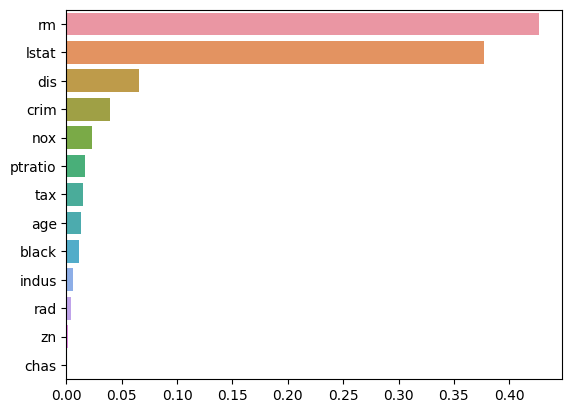

In [57]:
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y = feature_series.index)

> RegressionTree의 OverFitting 시각화

(100, 2)


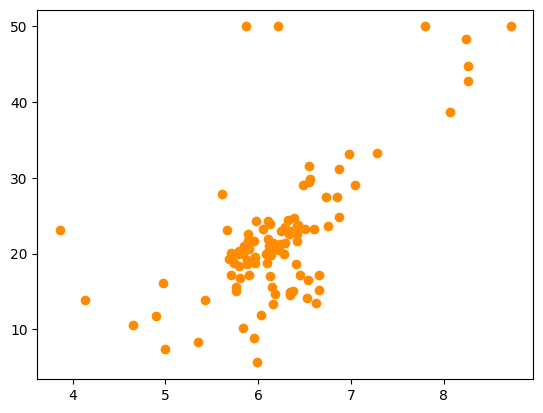

In [62]:
boston_df_sample = boston_df[['rm', 'medv']]
boston_df_sample = boston_df_sample.sample(n=100, random_state = 0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [64]:
# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth 는 각각 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, .04).reshape(-1,1)

# 보스터 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 medv 추출
X_feature = boston_df_sample['rm'].values.reshape(-1,1)
y_target = boston_df_sample['medv'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

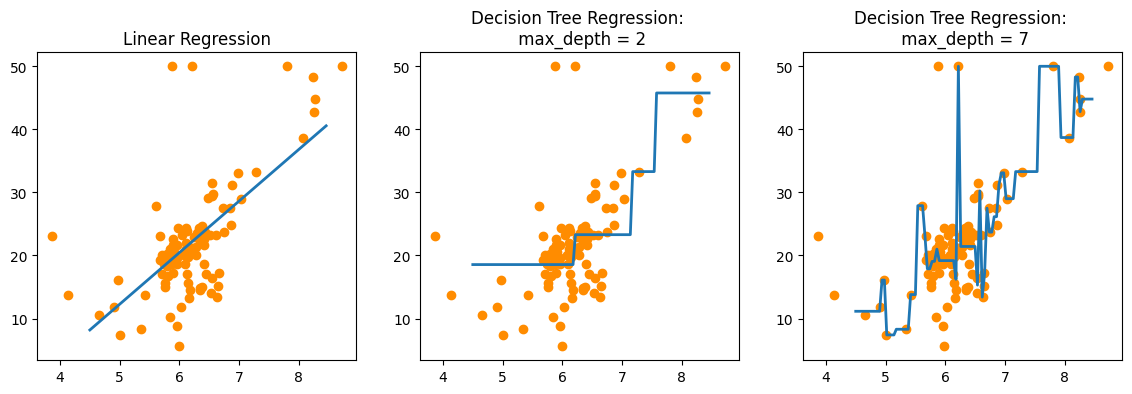

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols=3)

# x축값을 4.5~8.5로 변환하며 입력했을 때, 선형회귀와 결정트리회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.rm, boston_df_sample.medv, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(boston_df_sample.rm, boston_df_sample.medv, c ='darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth:2', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(boston_df_sample.rm, boston_df_sample.medv, c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth:7', linewidth = 2)

> 자전거 대여 수요 예측

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)



In [ ]:
bike = pd.read_csv('../datasets/bike/bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.drop(['casual', 'registered'], axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 문자열을 datetime으로 타입변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


- datetime 제외하고 해보자

In [ ]:
bike_df = pd.read_csv('../datasets/bike/bike_train.csv')

bike_df.drop(['casual', 'registered'], axis=1, inplace= True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error

In [ ]:
# log 값변환시 NaN등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE 계산 